<a href="https://colab.research.google.com/github/altnsksema/Script-Recognition-/blob/main/CNN_ile_El_Yaz%C4%B1s%C4%B1_Tan%C4%B1ma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test,  num_classes=10)

In [19]:
model = Sequential([Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                    MaxPooling2D(pool_size = (2, 2)),
                    Dropout(0.25),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D(pool_size = (2, 2)),
                    Dropout(0.25),
                    Flatten (),
                    Dense(128, activation='relu'),
                    Dropout(0.5),
                    Dense(10, activation='softmax')
                    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs = 10,
                    batch_size = 32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.8093 - loss: 0.5836 - val_accuracy: 0.9784 - val_loss: 0.0716
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.9642 - loss: 0.1197 - val_accuracy: 0.9851 - val_loss: 0.0525
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.9725 - loss: 0.0929 - val_accuracy: 0.9873 - val_loss: 0.0428
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 40ms/step - accuracy: 0.9773 - loss: 0.0748 - val_accuracy: 0.9890 - val_loss: 0.0383
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.9806 - loss: 0.0654 - val_accuracy: 0.9887 - val_loss: 0.0384
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.9809 - loss: 0.0632 - val_accuracy: 0.9906 - val_loss: 0.0329
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 38ms/step - accuracy: 0.9821 - loss: 0.0561 - val_accuracy: 0.9899 - val_loss: 0.0355
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.9852 -

In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Doğruluğu: {test_acc: .2f}")

Test Doğruluğu:  0.99


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


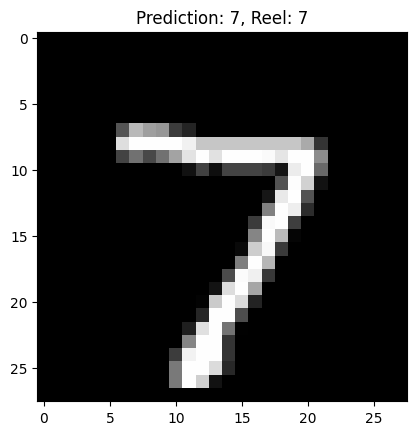

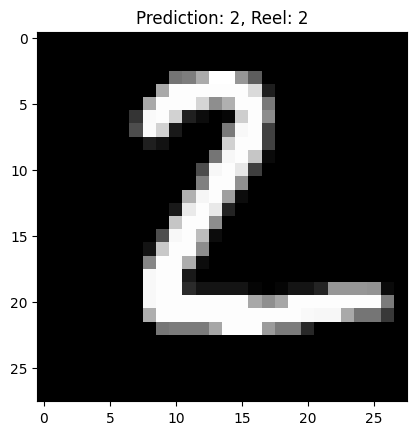

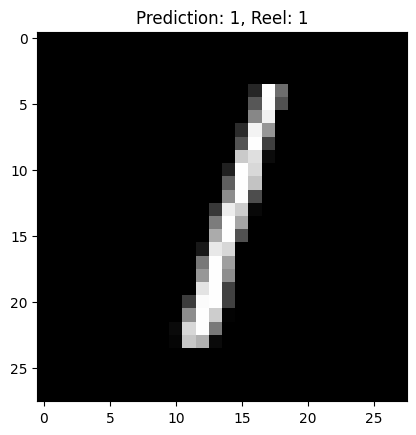

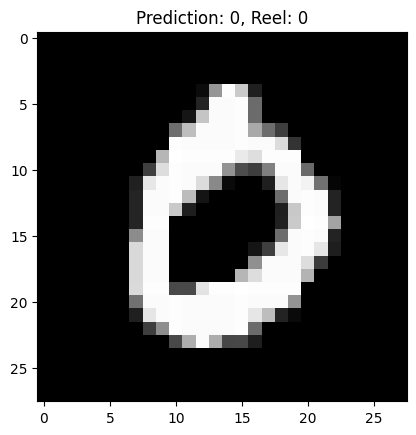

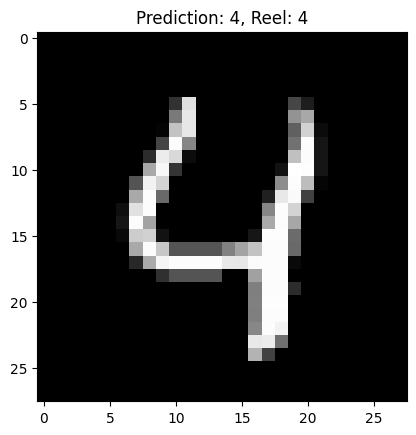

In [24]:
predictions = model.predict(X_test[:5])

for i in range(5):
  plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
  plt.title(f"Prediction: {np.argmax(predictions[i])}, Reel: {np.argmax(y_test[i])}")
  plt.show()